# Data Science Unit 1 Sprint Challenge 1

## Loading, cleaning, visualizing, and analyzing data

In this sprint challenge you will look at a dataset of the survival of patients who underwent surgery for breast cancer.

http://archive.ics.uci.edu/ml/datasets/Haberman%27s+Survival

Data Set Information:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.

Attribute Information:
1. Age of patient at time of operation (numerical)
2. Patient's year of operation (year - 1900, numerical)
3. Number of positive axillary nodes detected (numerical)
4. Survival status (class attribute)
-- 1 = the patient survived 5 years or longer
-- 2 = the patient died within 5 year

Sprint challenges are evaluated based on satisfactory completion of each part. It is suggested you work through it in order, getting each aspect reasonably working, before trying to deeply explore, iterate, or refine any given step. Once you get to the end, if you want to go back and improve things, go for it!

## Part 1 - Load and validate the data

- Load the data as a `pandas` data frame.
- Validate that it has the appropriate number of observations (you can check the raw file, and also read the dataset description from UCI).
- Validate that you have no missing values.
- Add informative names to the features.
- The survival variable is encoded as 1 for surviving >5 years and 2 for not - change this to be 0 for not surviving and 1 for surviving >5 years (0/1 is a more traditional encoding of binary variables)

At the end, print the first five rows of the dataset to demonstrate the above.

In [26]:
# LOAD DATA
import pandas as pd
df = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/haberman/haberman.data', header=None)
df.head(5)

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [27]:
df.shape

(306, 4)

In [28]:
Document gives us 306, 3...I wonder why. Upon closer inspection, the front page is incorrectly marked. The docs, found here: show that there are 306 instances and 4 atrtributes 

I assume it is because the first row is encoded as a index, but we can return to this later.

SyntaxError: invalid syntax (<ipython-input-28-5a83e14513d3>, line 1)

In [29]:
df.isna().sum().sum()

0

In [30]:
df.columns = ['Patient Age', 'Year of Operation', 'Postive Nodes Detected', 'Survival Status']

df.head()

,Patient Age,Year of Operation,Postive Nodes Detected,Survival Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [32]:
df['Survival Status'] = df['Survival Status'].replace(1, 0)
df.head(10)

,Patient Age,Year of Operation,Postive Nodes Detected,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
7,34,59,0,2
8,34,66,9,2
9,34,58,30,0


In [34]:
df['Survival Status'] = df['Survival Status'].replace(2, 1)
df.head(10)

,Patient Age,Year of Operation,Postive Nodes Detected,Survival Status
0,30,64,1,0
1,30,62,3,0
2,30,65,0,0
3,31,59,2,0
4,31,65,4,0
5,33,58,10,0
6,33,60,0,0
7,34,59,0,1
8,34,66,9,1
9,34,58,30,0


## Part 2 - Examine the distribution and relationships of the features

Explore the data - create at least *2* tables (can be summary statistics or crosstabulations) and *2* plots illustrating the nature of the data.

This is open-ended, so to remind - first *complete* this task as a baseline, then go on to the remaining sections, and *then* as time allows revisit and explore further.

Hint - you may need to bin some variables depending on your chosen tables/plots.

In [35]:
# TODO
df.describe()

,Patient Age,Year of Operation,Postive Nodes Detected,Survival Status
count,306.000000,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144,0.264706
std,10.803452,3.249405,7.189654,0.441899
min,30.000000,58.000000,0.000000,0.000000
25%,44.000000,60.000000,0.000000,0.000000
50%,52.000000,63.000000,1.000000,0.000000
75%,60.750000,65.750000,4.000000,1.000000
max,83.000000,69.000000,52.000000,1.000000


In [49]:
age_bins = pd.cut(df['Patient Age'], 5)  # 5 equal-sized bins
ct = pd.crosstab(df['Survival Status'], age_bins)
ct

Patient Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Survival Status,,,,,
0,39,68,69,43,6
1,4,31,27,16,3


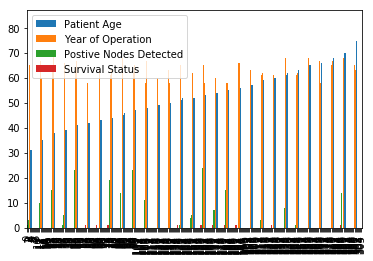

In [47]:
df.plot.bar()

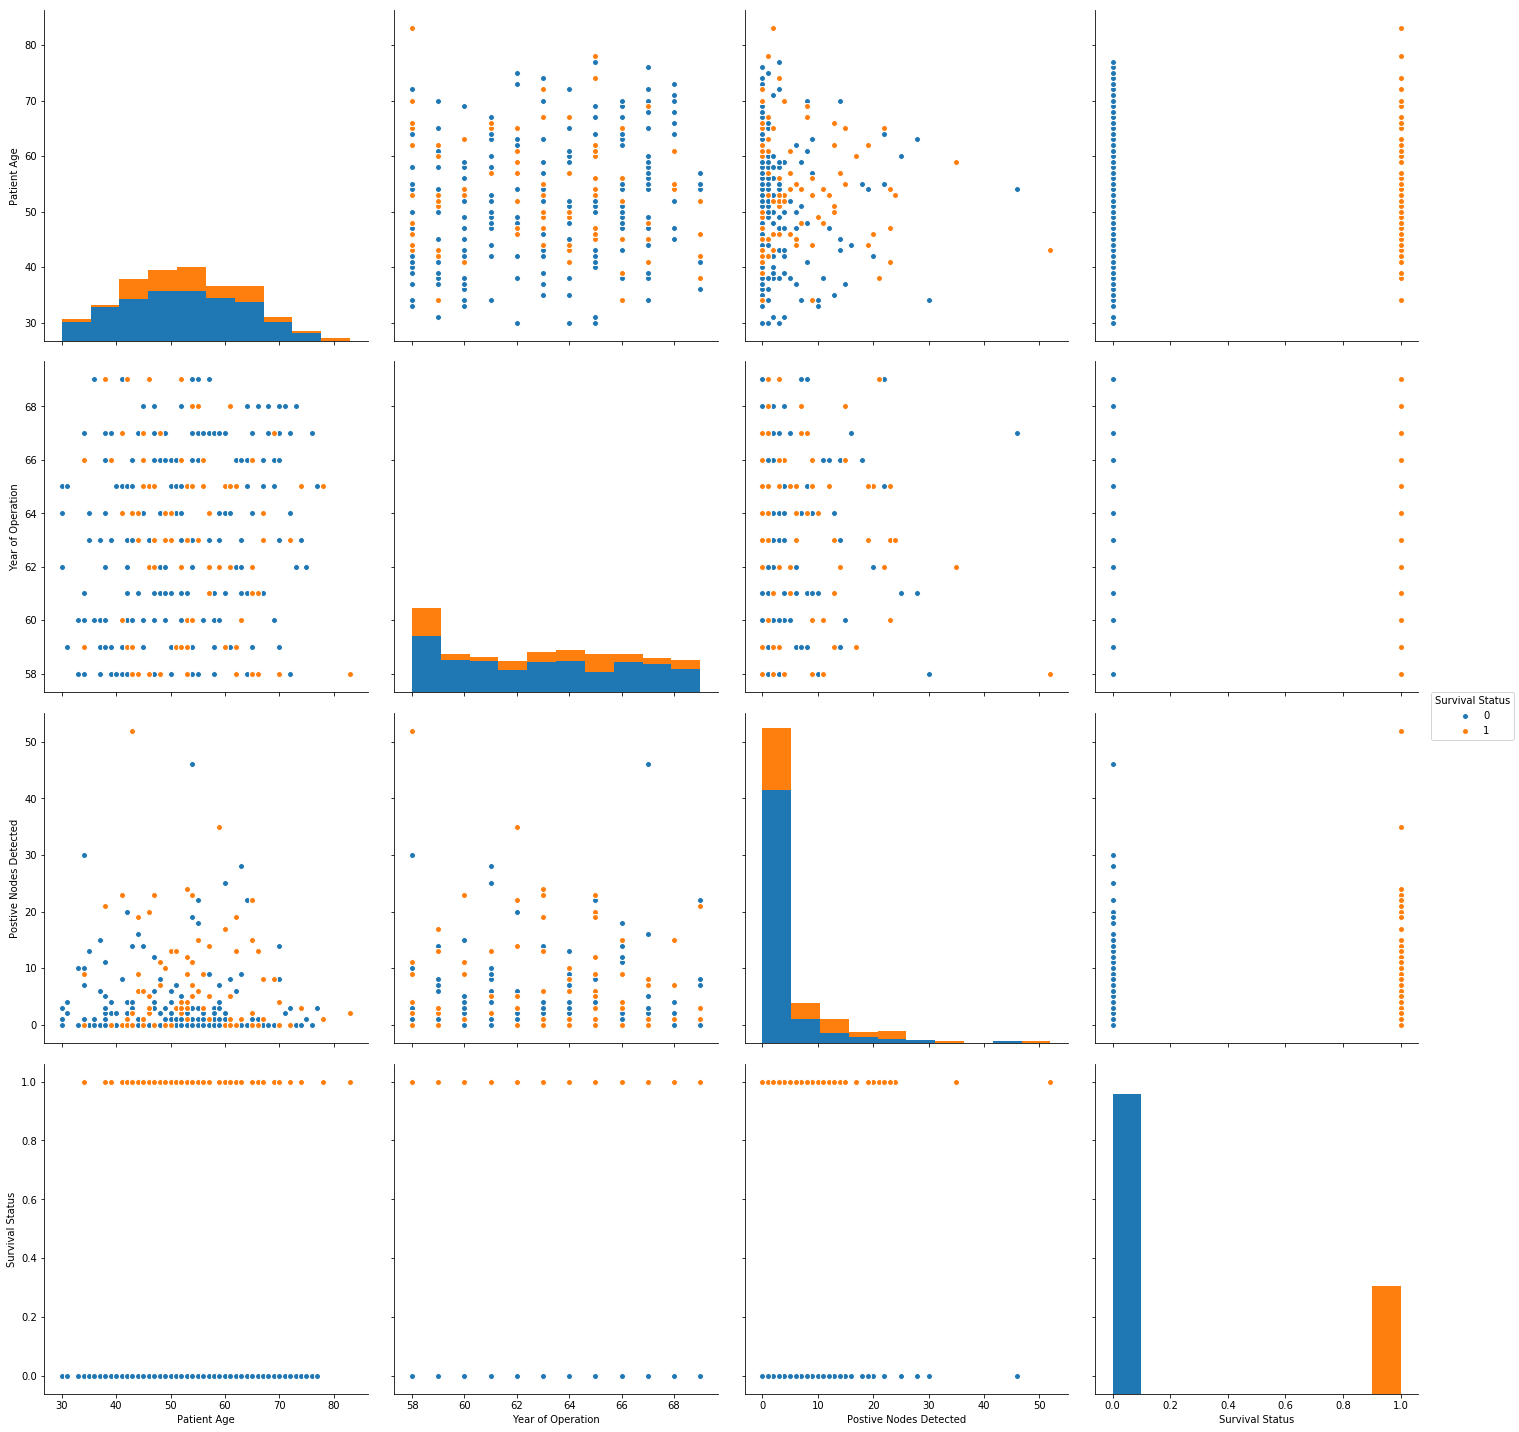

In [87]:
import seaborn as sns
sns.pairplot(df, hue='Survival Status', size=5);

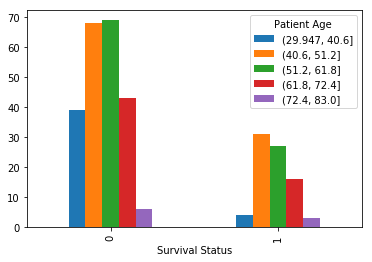

In [48]:
ct.plot.bar()

In [90]:
age_bins = pd.cut(df['Patient Age'], 5)  # 5 equal-sized bins
ct1 = pd.crosstab(df['Survival Status'], age_bins)
ct1

Patient Age,"(29.947, 40.6]","(40.6, 51.2]","(51.2, 61.8]","(61.8, 72.4]","(72.4, 83.0]"
Survival Status,,,,,
0,39,68,69,43,6
1,4,31,27,16,3


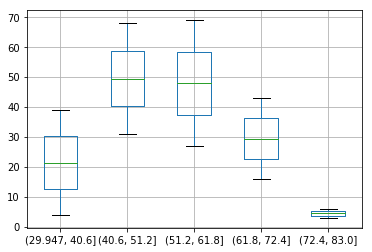

In [91]:
ct1.boxplot()

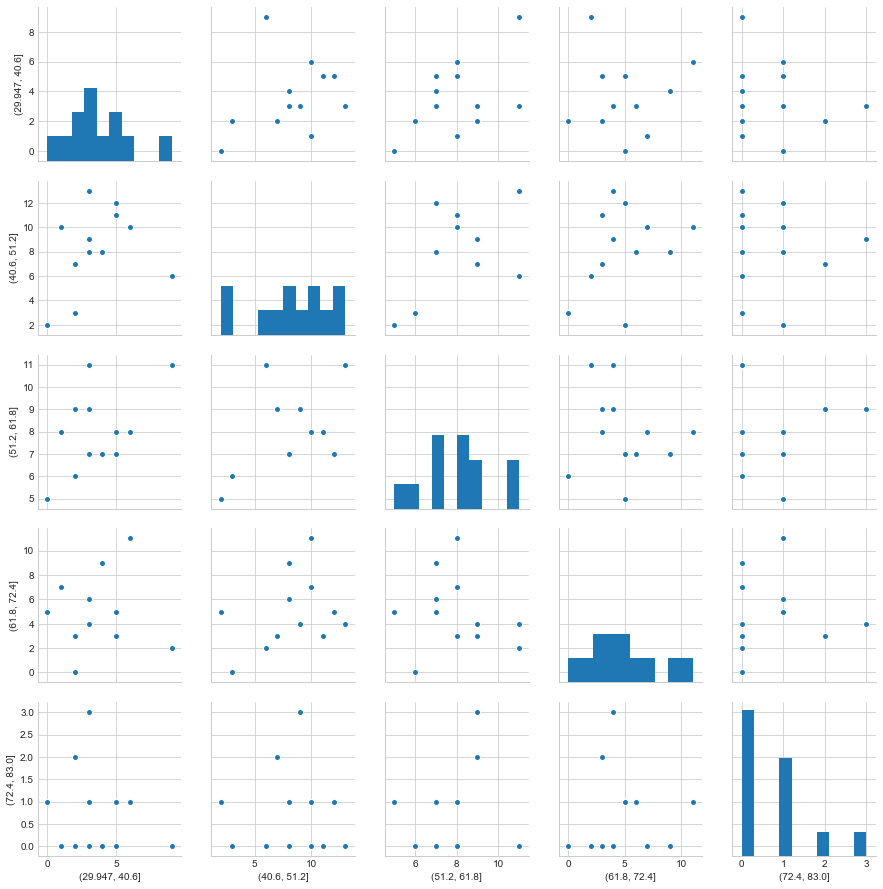

In [124]:
ct1 = pd.crosstab(df['Postive Nodes Detected'], age_bins)
ct1
sns.pairplot(ct2, size=2.5);

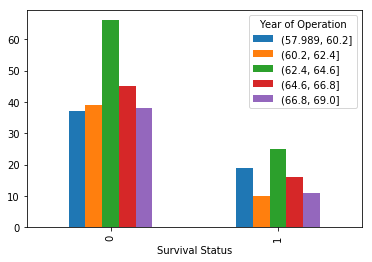

In [82]:
ct2.plot.bar()

C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


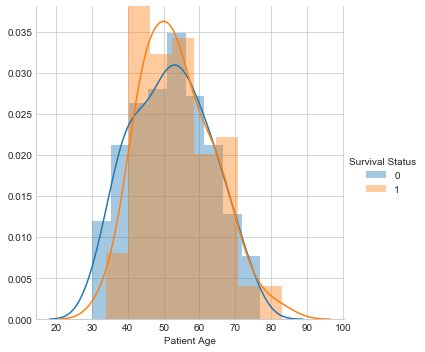

C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


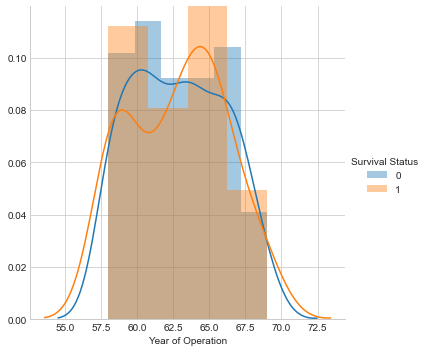

C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\Users\Thier\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


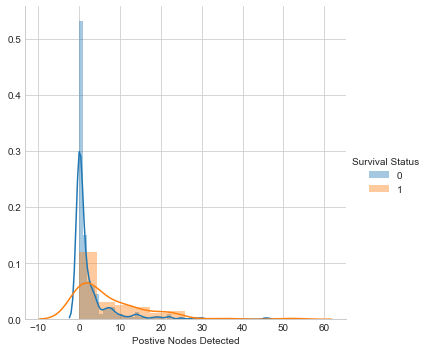

In [110]:
for idx, feature in enumerate(list(df.columns)[:-1]):
    fg = sns.FacetGrid(df, hue='Survival Status', size=5)
    sns.set_style("whitegrid")
    fg.map(sns.distplot, feature).add_legend()
    plt.show()

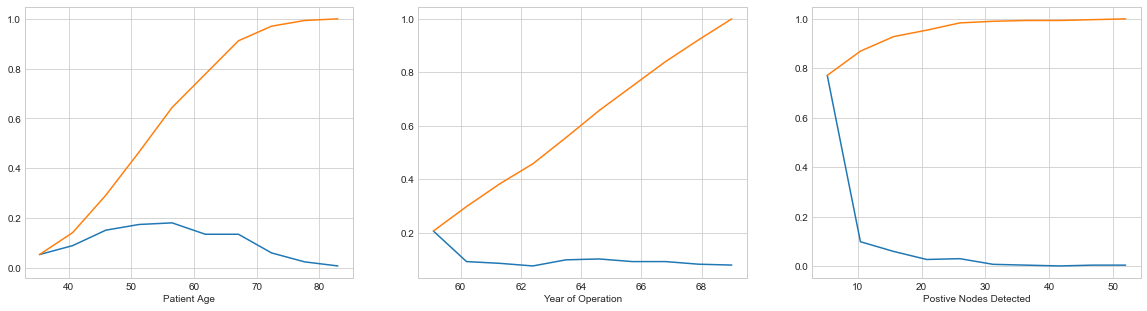

In [119]:
import numpy as np
plt.figure(figsize=(20,5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    plt.subplot(1, 3, idx+1)
    counts, bin_edges = np.histogram(df[feature], bins=10, density=True)
    pdf = counts/sum(counts)
    cdf = np.cumsum(pdf)
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf)
    plt.xlabel(feature)

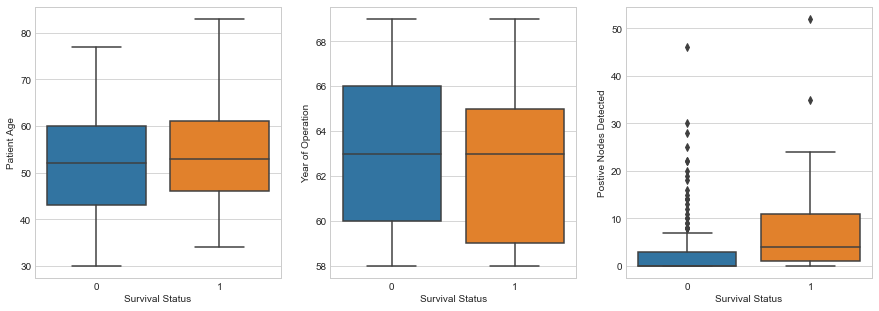

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
for idx, feature in enumerate(list(df.columns)[:-1]):
    sns.boxplot( x='Survival Status', y=feature, data=df, ax=axes[idx])
plt.show()

## Part 3 - Analysis and Interpretation

Now that you've looked at the data, answer the following questions:

- What is at least one feature that looks to have a positive correlation with survival?
- What is at least one feature that looks to have a negative correlation with survival?
- How are those two features related with each other, and what might that mean?

Answer with text, but feel free to intersperse example code/results or refer to it from earlier.

In [ ]:
It is very hard to draw any strong conclusions from this dataset for a few reasons:

One feature that looks to have a positive correlation with survival is year of operation. However, the relationship is not linear. There is a statistical significance before and after the 60s 

In [ ]:
One feature that has a positive corealtion is year of operation. 

In [ ]:
One feature that looks to have a negative corealtion is positive nodes. The more postive nodes you have, the less likely you are to survive. 

In [ ]:
Year of operation and postive nodes could be related to each other in a few ways:
    
    Docts might have gotten better at detecting positive nodes
    Docs might have gotten better at detecting false positive nodes
    Docs might have been willing to treat patients earlier
    Noise in the data(less than 400 samples, and huge variation in nodes)
    
    This means that in order to get the best value out of either variable it is useful to know the methods and accuracy of the time. 